In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

Current path

In [2]:
current_path = os.getcwd()

Kreiranje dataFrame-a i čitanje prvih par redaka

In [3]:
df = pd.read_csv("university_ranking.csv")
df.head(201)

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,198,Durham University,United Kingdom,"18,425",14.1,35%,54 : 46,54.4,40.0,44.6,70.0,39.4,94.3
197,198,Queen’s University Belfast,NaN,"19,060",15.8,39%,57 : 43,54.4,31.1,37.9,84.4,41.6,97.4
198,198,University of Reading,United Kingdom,"15,720",16.4,32%,56 : 44,54.4,36.5,39.6,78.5,42.2,93.3
199,201–250,Aalto University,Finland,"13,306",19.7,21%,38 : 62,51.2–54.3,38.3,40.4,67.5,53.2,81.9


Convert csv to excel.

In [4]:
# path to excel folder
excel_folder_path = os.path.join(current_path, 'excel')
# save excel
excel_file_path = os.path.join(excel_folder_path, 'data.xlsx')
df.to_excel(excel_file_path, index=False)


### CHECK DATA

### 1. Summary of a DataFrame.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              2341 non-null   object 
 1   Name of University           2233 non-null   object 
 2   Location                     2047 non-null   object 
 3   No of student                2209 non-null   object 
 4   No of student per staff      2208 non-null   float64
 5   International Student        2209 non-null   object 
 6   Female:Male Ratio            2128 non-null   object 
 7   OverAll Score                1799 non-null   object 
 8   Teaching Score               1799 non-null   float64
 9   Research Score               1799 non-null   float64
 10  Citations Score              1799 non-null   float64
 11  Industry Income Score        1799 non-null   float64
 12  International Outlook Score  1799 non-null   float64
dtypes: float64(6), obj

### 2. Checking for missing values

Check for percentage of missing values in each column with isnull().

In [6]:
missing_val= df.isnull().mean()*100
missing_val_sorted = missing_val.sort_values(ascending=False)
missing_val_sorted

OverAll Score                  23.152499
Teaching Score                 23.152499
Research Score                 23.152499
Citations Score                23.152499
Industry Income Score          23.152499
International Outlook Score    23.152499
Location                       12.558736
Female:Male Ratio               9.098676
No of student per staff         5.681333
No of student                   5.638616
International Student           5.638616
Name of University              4.613413
University Rank                 0.000000
dtype: float64

Once we have identified the columns with missing values, we need to decide how to deal with them.

### 3. Handling Missing Data

Drop variable "Name of University". Without the name of the university, we lose the ability to identify which university it is, so we will delete rows with missing values of name.

In [7]:
# Print the number of rows before cleaning
print(f"Number of rows before: {len(df)}")

# Drop rows where the 'Name of University' column has missing values
df_cleaned = df.dropna(subset=["Name of University"])

# Print the number of rows after cleaning
print(f"Number of rows after deleting missing values of the variable 'Name of University': {len(df_cleaned)}")

df_cleaned.info()


Number of rows before: 2341
Number of rows after deleting missing values of the variable 'Name of University': 2233
<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 0 to 2340
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              2233 non-null   object 
 1   Name of University           2233 non-null   object 
 2   Location                     2047 non-null   object 
 3   No of student                2209 non-null   object 
 4   No of student per staff      2208 non-null   float64
 5   International Student        2209 non-null   object 
 6   Female:Male Ratio            2128 non-null   object 
 7   OverAll Score                1721 non-null   object 
 8   Teaching Score               1721 non-null   float64
 9   Research Score               1721 non-null   float64
 10  Citations Score              1721 non-null   float64
 11  Industry Income Score  

In [8]:
# save cleaned dataset
df_cleaned.to_csv('university_ranking_cleaned_1.csv')

# save new dataset to excel
df_cleaned.to_excel(os.path.join(excel_folder_path, 'data_cleaned_1.xlsx'), index=False)

### Review of Variables with Missing Values

#### Variables with Missing Values<br>
OverAll Score: 23.15% missing values<br>
Teaching Score: 23.15% missing values<br>
Research Score: 23.15% missing values<br>
Citations Score: 23.15% missing values<br>
Industry Income Score: 23.15% missing values<br>
International Outlook Score: 23.15% missing values<br>
Location: 12.56% missing values<br>
Female:Male Ratio: 9.10% missing values<br>
No of student per staff: 5.68% missing values<br>
No of student: 5.64% missing values<br>
International Student: 5.64% missing values<br>

### Check data type

In [9]:
# Check if types are numeric for columns
columns_to_check = [
    "OverAll Score", 
    "Teaching Score",
    "Research Score",
    "Citations Score",
    "Industry Income Score",
    "International Outlook Score"
]

for column in columns_to_check:
    is_numeric = pd.api.types.is_numeric_dtype(column)
    print(f"{column} is numeric: {is_numeric}")


OverAll Score is numeric: False
Teaching Score is numeric: False
Research Score is numeric: False
Citations Score is numeric: False
Industry Income Score is numeric: False
International Outlook Score is numeric: False


Now we'll check what data types are in each column

In [10]:
# Columns to check
columns_to_check = [
    "OverAll Score", 
    "Teaching Score",
    "Research Score",
    "Citations Score",
    "Industry Income Score",
    "International Outlook Score"
]

# Function to categorize value type
def value_type(value):
    if pd.isna(value):
        return 'NaN values'
    elif value == '':
        return 'Empty Strings'
    elif isinstance(value, str):
        return 'Strings'
    elif isinstance(value, int):
        return 'Integers'
    elif isinstance(value, float):
        return 'Floats'
    elif value is None:
        return 'None'
    else:
        return 'Other types'

# Iterate through each column and count types
for column_name in columns_to_check:
    type_counts = df_cleaned[column_name].apply(value_type).value_counts()
    print(f"Results for column '{column_name}':")
    for type_name, count in type_counts.items():
        print(f"  {type_name}: {count}")
    print() 

Results for column 'OverAll Score':
  Strings: 1721
  NaN values: 512

Results for column 'Teaching Score':
  Floats: 1721
  NaN values: 512

Results for column 'Research Score':
  Floats: 1721
  NaN values: 512

Results for column 'Citations Score':
  Floats: 1721
  NaN values: 512

Results for column 'Industry Income Score':
  Floats: 1721
  NaN values: 512

Results for column 'International Outlook Score':
  Floats: 1721
  NaN values: 512



Some values in the 'OverAll Score' column are ranges (e.g., '48.9–51.1'). These need to be handled appropriately since ranges cannot be directly converted to numeric values. The approach will involve extracting an average or a midpoint from these ranges for consistency.


In [11]:
# Define function to handle ranges and convert to float
def convert_to_float(value):
    try:
        # dash
        if '–' in value:  
            low, high = map(float, value.split('–'))
            return (low + high) / 2
        # hyphen
        elif '-' in value:  
            low, high = map(float, value.split('-'))
            return (low + high) / 2
        else:
            return float(value)
    except ValueError:
        return np.nan

df_converted_to_numeric = df_cleaned.copy()

# Apply the function to the columns
for column in columns_to_check:
    df_converted_to_numeric[column] = df_converted_to_numeric[column].apply(lambda x: convert_to_float(str(x).strip()))

# Check the data after conversion
print(df_converted_to_numeric[columns_to_check].head())

# Save the new DataFrame
df_converted_to_numeric.to_csv('university_converted_to_numeric.csv', index=False)

   OverAll Score  Teaching Score  Research Score  Citations Score  \
0           96.4            92.3            99.7             99.0   
1           95.2            94.8            99.0             99.3   
2           94.8            90.9            99.5             97.0   
3           94.8            94.2            96.7             99.8   
4           94.2            90.7            93.6             99.8   

   Industry Income Score  International Outlook Score  
0                   74.9                         96.2  
1                   49.5                         80.5  
2                   54.2                         95.8  
3                   65.0                         79.8  
4                   90.9                         89.3  


In [12]:
# save new dataset to excel
df_converted_to_numeric.to_excel(os.path.join(excel_folder_path, 'data_cleaned_2.xlsx'), index=False)

### Regression Imputation

We use Regression Imputation for numerical variables to fill these crucial numerical variables by leveraging other scores and available data.
For this variables we will use Regression Imputation:<br>
OverAll Score,<br> 
Teaching Score,<br>
Research Score,<br>
Citations Score,<br>
Industry Income Score,<br> 
International Outlook Score<br>

First we will convert data type to numerical, because now we have strings.

In [13]:
# Funkcija za regresijsku imputaciju
def regression_impute(df, target_column):
    known_data = df[df[target_column].notnull()]
    unknown_data = df[df[target_column].isnull()]

    X_train = known_data.drop(columns=['Name of University', 'Location', target_column])
    y_train = known_data[target_column]

    X_test = unknown_data.drop(columns=['Name of University', 'Location', target_column])

    # Odabir samo numeričkih stupaca za regresiju
    X_train = X_train.select_dtypes(include=[np.number])
    X_test = X_test.select_dtypes(include=[np.number])

    # Imputacija nedostajućih vrijednosti
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Treniranje modela
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predikcija nedostajućih vrijednosti
    predicted_values = model.predict(X_test)
    df.loc[df[target_column].isnull(), target_column] = predicted_values

# Imputacija za svaki od ključnih numeričkih stupaca
for column in columns_to_check:
    regression_impute(df_converted_to_numeric, column)

# Provjera podataka nakon imputacije
df_converted_to_numeric.info()

df_after_regression = df_converted_to_numeric.copy()
# Ispis za potvrdu
print("Regresijska imputacija je završena. Kopija podataka je spremljena kao 'df_after_regression'.")

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 0 to 2340
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              2233 non-null   object 
 1   Name of University           2233 non-null   object 
 2   Location                     2047 non-null   object 
 3   No of student                2209 non-null   object 
 4   No of student per staff      2208 non-null   float64
 5   International Student        2209 non-null   object 
 6   Female:Male Ratio            2128 non-null   object 
 7   OverAll Score                2233 non-null   float64
 8   Teaching Score               2233 non-null   float64
 9   Research Score               2233 non-null   float64
 10  Citations Score              2233 non-null   float64
 11  Industry Income Score        2233 non-null   float64
 12  International Outlook Score  2233 non-null   float64
dtypes: float64(7), object(6

In [14]:
df_after_regression.to_csv('university_after_regression.csv')

In [15]:
# save new dataset to excel
df_after_regression.to_excel(os.path.join(excel_folder_path, 'data_cleaned_3.xlsx'), index=False)

## Visualization

University Locations.

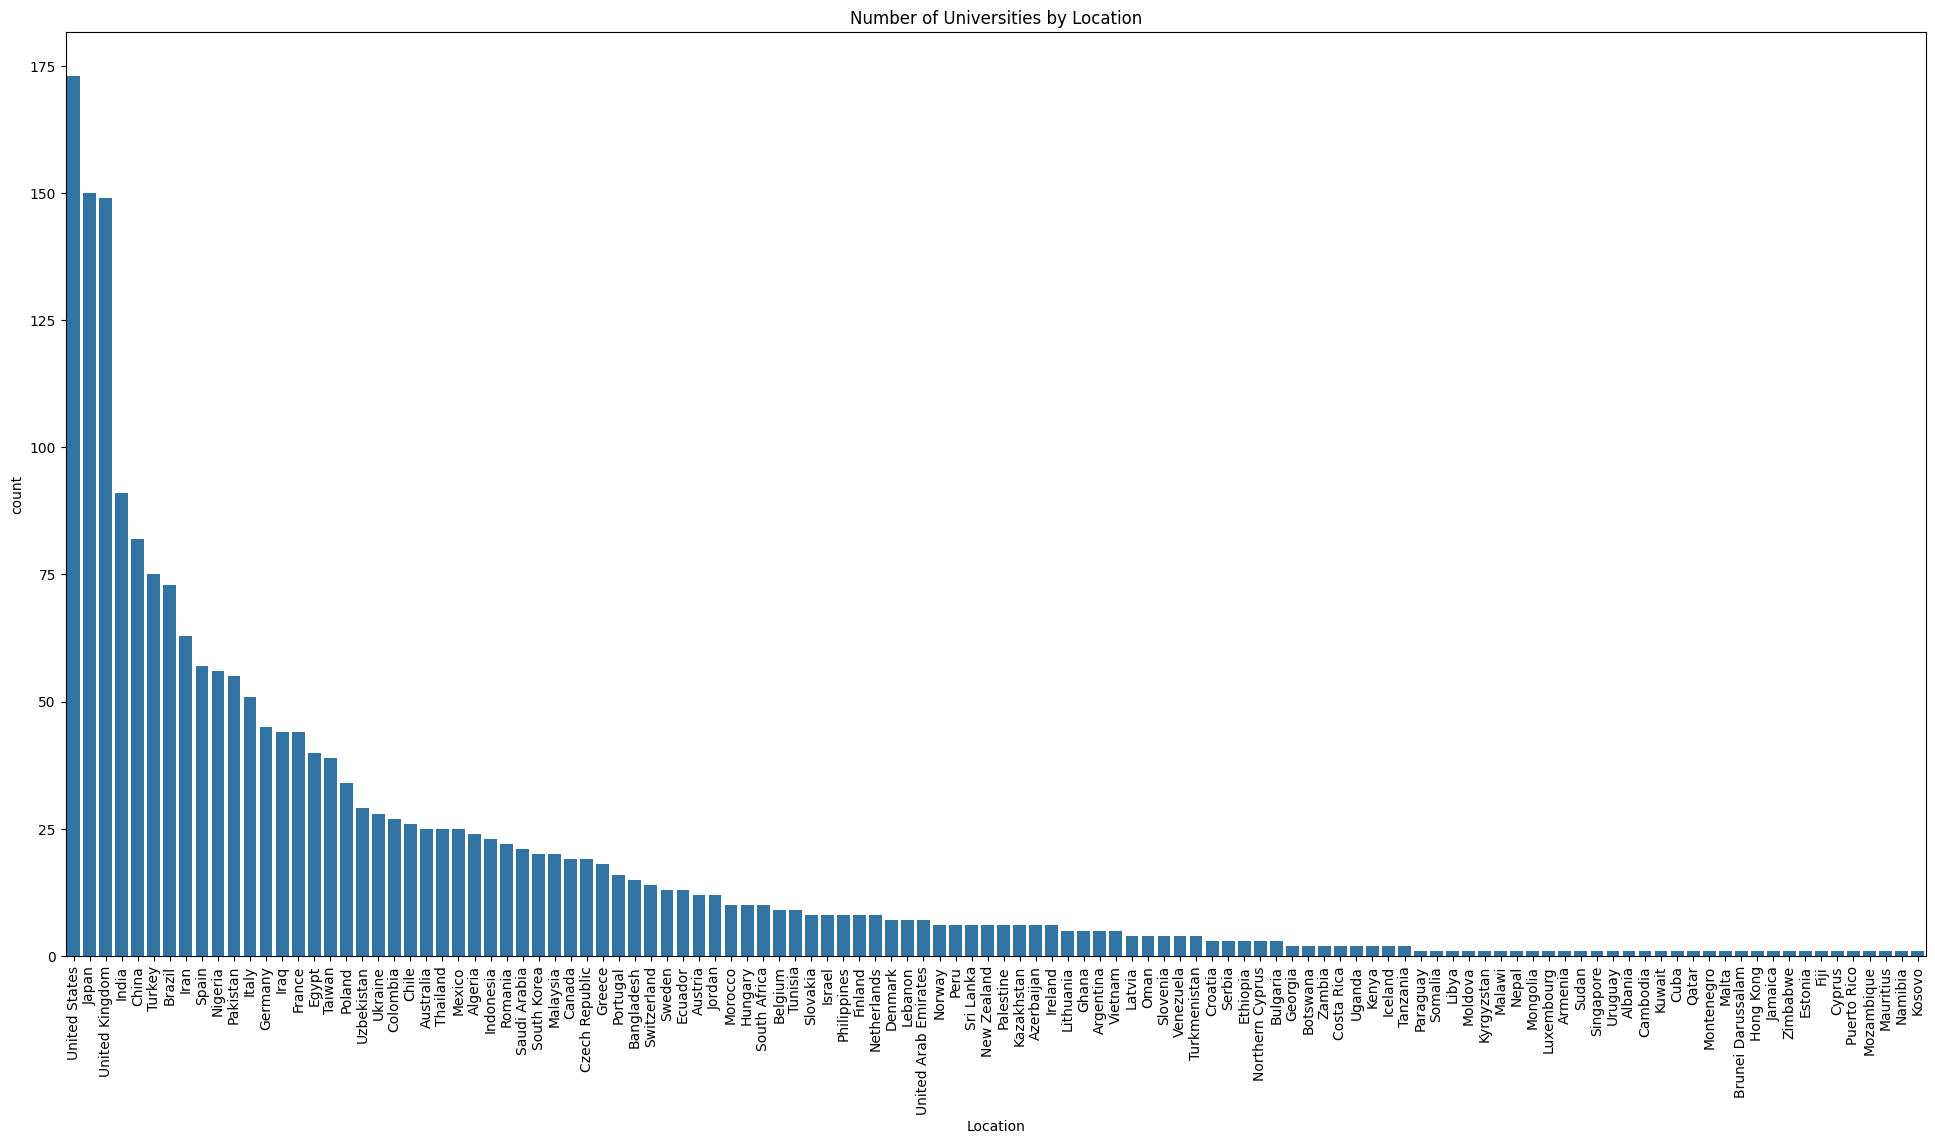

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# Bar plot for university locations
# Bar plot for university locations
plt.figure(figsize=(24, 12))
sns.countplot(data=df_after_regression, x='Location', order=df_after_regression['Location'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Universities by Location')
plt.show()

Histogram for "OverAll Score"

C:\Users\dklobucar\AppData\Local\Temp\ipykernel_64284\374598678.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_universities, x='OverAll Score', y='Name of University', palette='viridis')


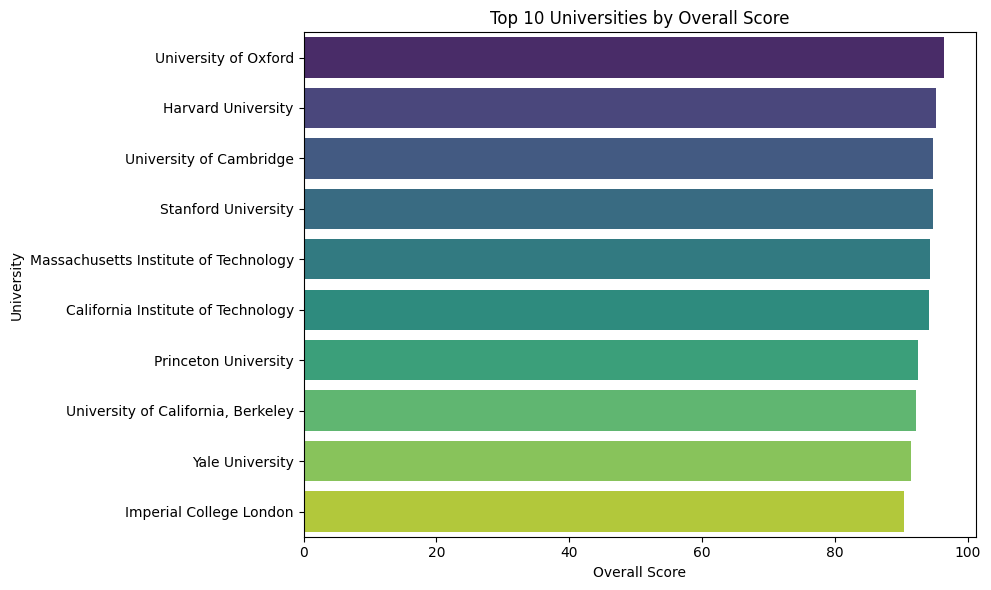

In [17]:
# Sort by 'OverAll Score' to find the top universities
df_sorted = df_after_regression.sort_values(by='OverAll Score', ascending=False)

# Select the top 10 universities for visualization
top_universities = df_sorted.head(10)

# Create a horizontal bar plot for the top universities by 'OverAll Score'
plt.figure(figsize=(10, 6))
sns.barplot(data=top_universities, x='OverAll Score', y='Name of University', palette='viridis')
plt.title('Top 10 Universities by Overall Score')
plt.xlabel('Overall Score')
plt.ylabel('University')
plt.tight_layout()
plt.show()

### 1.How many universities are there in the dataset?

In [41]:
df_working= pd.read_csv('university_after_regression.csv')
df_working.head()

,Unnamed: 0,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


In [42]:
df_working= pd.read_csv('university_after_regression.csv')
print(df_working.columns)


Index(['Unnamed: 0', 'University Rank', 'Name of University', 'Location',
       'No of student', 'No of student per staff', 'International Student',
       'Female:Male Ratio', 'OverAll Score', 'Teaching Score',
       'Research Score', 'Citations Score', 'Industry Income Score',
       'International Outlook Score'],
      dtype='object')


In [43]:
print(f"There are {len(df_working)} universities in the dataset.")

There are 2233 universities in the dataset.


### 2. How many different countries are there?


In [44]:
count_locations = df_working["Location"].nunique()
print(f"There are {count_locations} different countries in the dataset.")

There are 116 different countries in the dataset.


### 3. What is the distribition of contries in top 100 universities?

In [45]:
# sort by "OverALL Score"
top_100_uni = df_working.sort_values(by="OverAll Score", ascending=False).head(100)
#print(top_100_uni)

# Count the occurrences of each country in the 'Location' column
county_distribution = top_100_uni['Location'].value_counts()
print(county_distribution)

Location
United States     34
United Kingdom     7
Germany            6
Switzerland        4
Australia          4
France             4
Netherlands        4
China              3
Canada             2
Japan              2
South Korea        2
Singapore          1
Sweden             1
Name: count, dtype: int64


### 4. What is the average number of students in top 10 universities?

In [99]:
df_working= pd.read_csv('university_after_regression.csv')
# sort and get top 10 university by overALL Score
top_10_uni = df_working.sort_values(by="OverAll Score", ascending=False).head(10)

# Check if 'No of student' column is numeric
is_numeric = pd.api.types.is_numeric_dtype(top_10_uni["No of student"])
print(f"The 'No of student' column is numeric: {is_numeric}")

The 'No of student' column is numeric: False


In [100]:
type_counts = top_10_uni['No of student'].apply(value_type).value_counts()

for type_name, count in type_counts.items():
    print(f"No of student column:")
    print(f"{type_name}:{count}")

No of student column:
Strings:10


In [101]:
# Print non-numeric values from the 'No of student' column
non_numeric_values = top_10_uni['No of student'][top_10_uni['No of student'].isna()]
print(non_numeric_values)

Series([], Name: No of student, dtype: object)


In [102]:
# removing commas and convert to numeric
top_10_uni['No of student'] = top_10_uni['No of student'].str.replace(',', '').astype(float)

In [103]:
mean_students = top_10_uni['No of student'].mean()

In [104]:
print(f"The mean number of students in top 10 uni is: {mean_students}")

The mean number of students in top 10 uni is: 17408.0


### 5. Which are the top 10 universities with more than 50% international student?

In [168]:
# Load data
df_universities = df_working.sort_values(by="OverAll Score", ascending=False)

# check which data type
type_counts = df_universities["International Student"].apply(value_type).value_counts()

for type_name, count in type_counts.items():
    print(f"International Student column:")
    print(f"{type_name}:{count}")

International Student column:
Strings:2209
International Student column:
NaN values:24


In [169]:
# Replace empty strings with NaN before conversion
df_universities["International Student"] = df_universities["International Student"].replace('', np.nan)

In [170]:
# convert to numeric
df_universities["International Student"] = pd.to_numeric(df_universities["International Student"].str.replace('%', ''), errors='coerce')

In [171]:
# Filter dataframe
df_international = df_universities[df_universities['International Student'] > 50]

In [173]:
# sort by OverAllScore
top_10_sorted = df_international.sort_values(by="OverAll Score", ascending=False)[['Name of University','International Student']].head(10)
print(top_10_sorted)

                                   Name of University  International Student
9                             Imperial College London                   61.0
21                                                UCL                   60.0
34                              King’s College London                   52.0
36   London School of Economics and Political Science                   73.0
40           École Polytechnique Fédérale de Lausanne                   62.0
61                     Australian National University                   51.0
98                       City University of Hong Kong                   62.0
144                             Maastricht University                   56.0
218        Macau University of Science and Technology                   91.0
216                          University of Luxembourg                   51.0


### 6. Which are the top 10 universities with a predominantly female presence?


In [294]:
# Load data
df_work= pd.read_csv('university_after_regression.csv')

In [295]:
# check which data type
type_counts = df_work["Female:Male Ratio"].apply(value_type).value_counts()

for type_name, count in type_counts.items():
    print(f"{type_name}:{count}")


Strings:2128
NaN values:105


In [296]:
# Replace empty strings with NaN before conversion
df_work["Female:Male Ratio"] = df_work["Female:Male Ratio"].replace('', np.nan) 

In [297]:
# Drop rows where "Female:Male Ratio" is NaN
df_work.dropna(subset=["Female:Male Ratio"], inplace=True)

In [298]:
def parse_female_percentage(ratio):
    parts = ratio.split(':')
    if len(parts) == 2:
        female_part = int(parts[0].strip())
        male_part = int(parts[1].strip())
        return (female_part / (female_part + male_part)) * 100
    else:
        return np.nan  

In [299]:
# Apply the conversion function
df_work['Female Percentage'] = df_work['Female:Male Ratio'].apply(parse_female_percentage)

In [300]:
df_filter = df_work['Female Percentage'] > 50
print(df_filter)

0       False
1       False
2       False
3       False
4       False
        ...  
2204     True
2205     True
2206    False
2207    False
2208     True
Name: Female Percentage, Length: 2128, dtype: bool


In [301]:
# filter universities
df_filter = df_work[df_work['Female Percentage'] > 50]

In [304]:
top_10_females = df_filter.sort_values(by="OverAll Score", ascending=False)[['Name of University','Female:Male Ratio']].head(10)
print(top_10_females)

                       Name of University Female:Male Ratio
7      University of California, Berkeley           52 : 48
8                         Yale University           52 : 48
13             University of Pennsylvania           53 : 47
14               Johns Hopkins University           53 : 47
17                  University of Toronto           56 : 44
18       National University of Singapore           51 : 49
19                     Cornell University           51 : 49
20  University of California, Los Angeles           56 : 44
21                                    UCL           59 : 41
23                    New York University           57 : 43
